In [252]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
!apt-get update -qq
!apt-get install fonts-nanum -qq
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [255]:
%matplotlib inline
import matplotlib as mpl

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name


In [256]:
import matplotlib
print("현재 설정된 폰트:", matplotlib.rcParams['font.family'])


현재 설정된 폰트: ['NanumGothic']


In [257]:
import matplotlib
print(matplotlib.rcParams['font.family'])

['NanumGothic']


#논외) 데이터 정보 파악하기

In [258]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/전기차/전기차/train.csv")

In [259]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [260]:
train.tail()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.00,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.00,RWD,39445,6,No,2,24.00
7496,TRAIN_7496,T사,MY,Pre-Owned,51.94,AWD,80215,0,No,0,74.06




*    일반적으로 전기차 배터리 성능은 '8년 또는 주행거리 16만km 내에서 70% 수준을 유지
![image.png](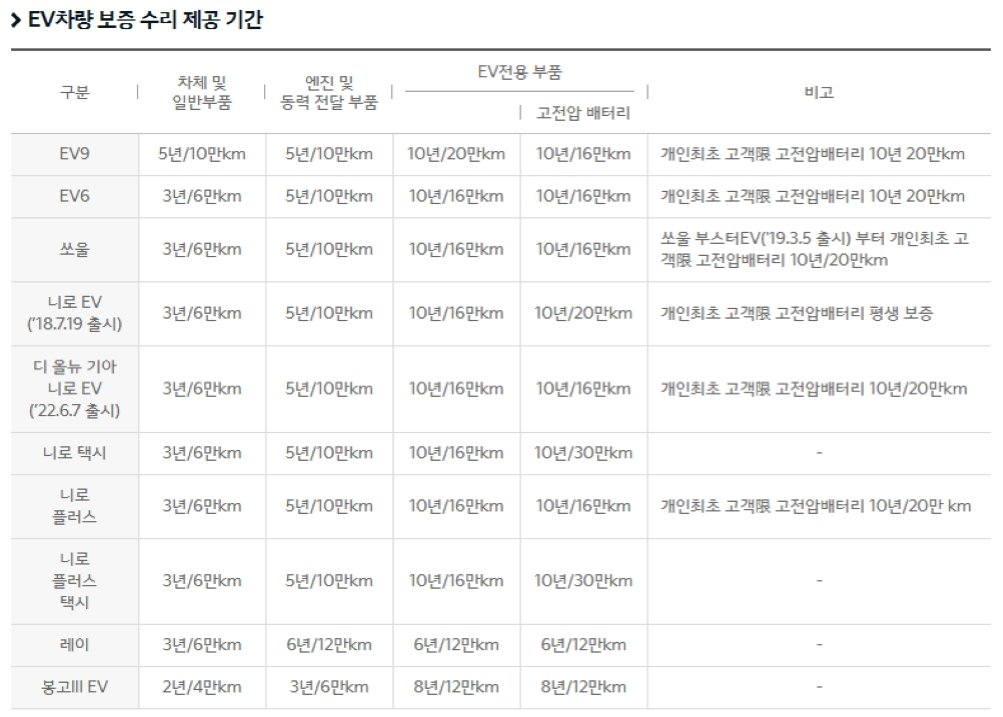![image.png](ㅍ))![image.png](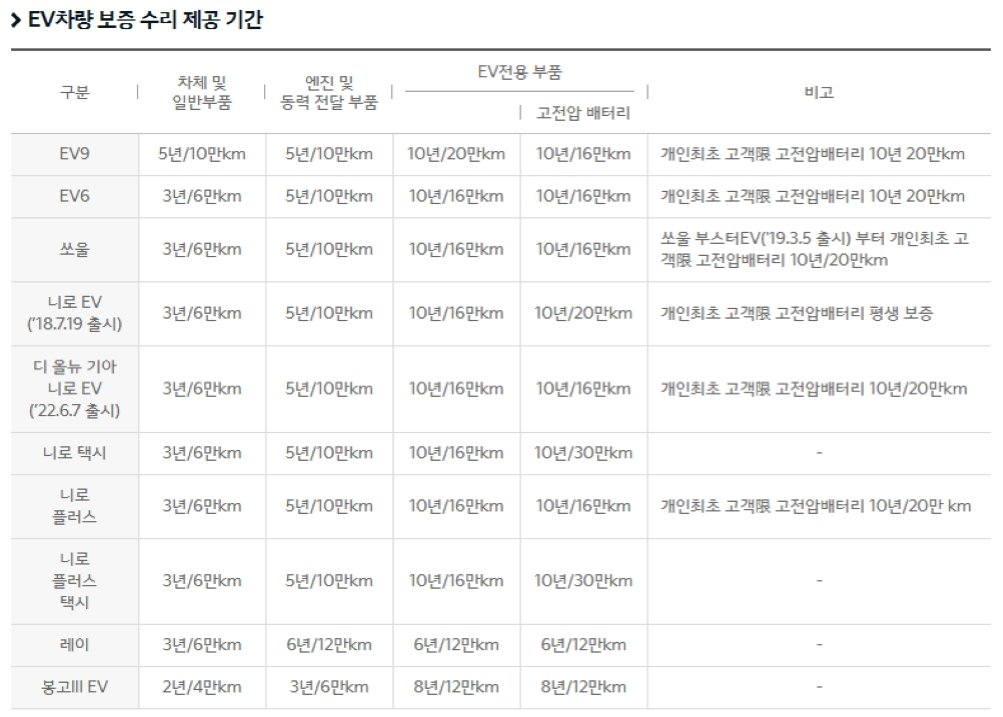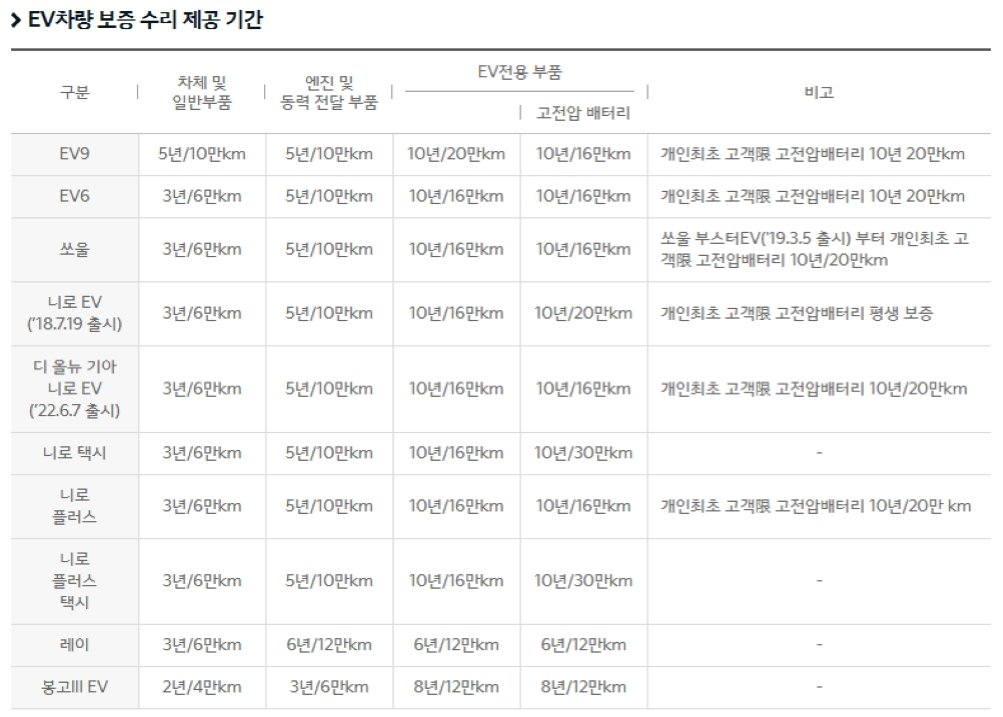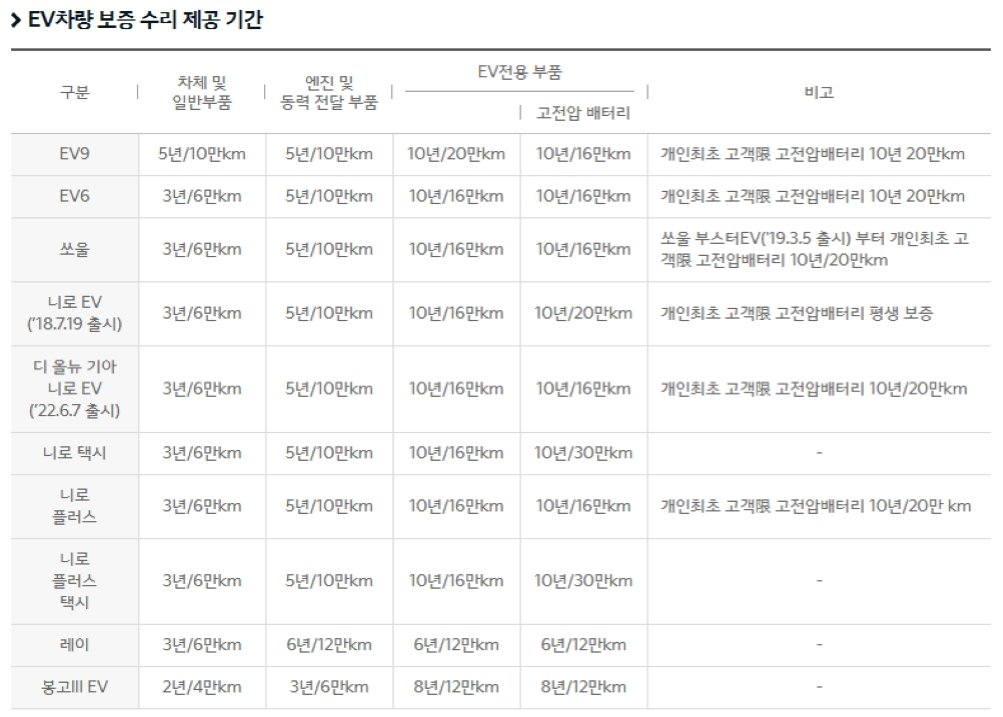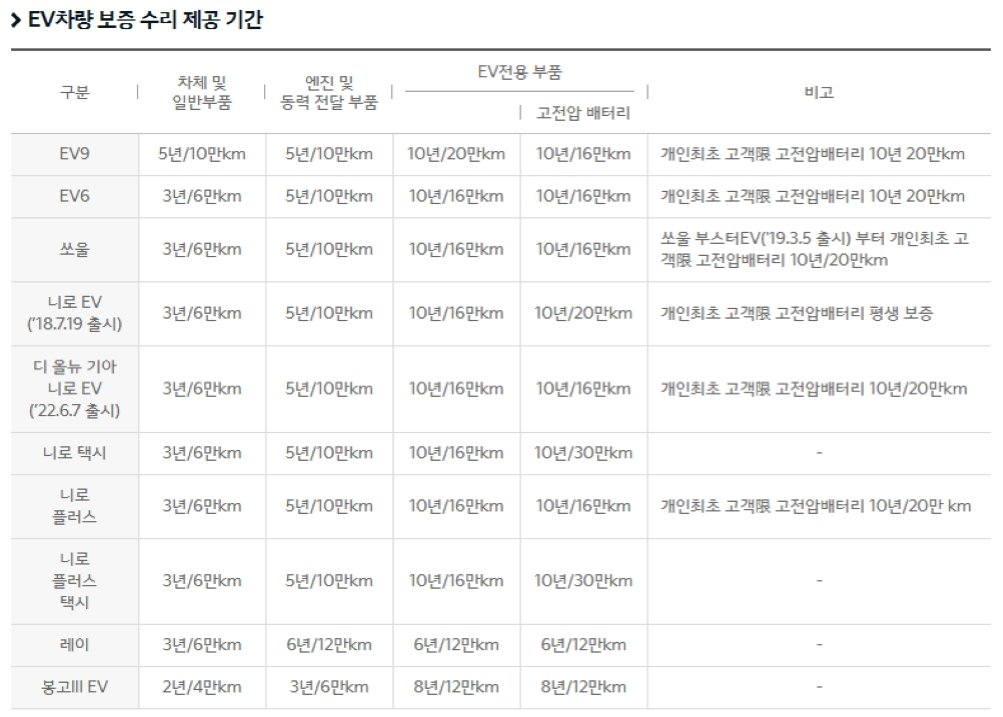AABJRU5ErkJggg==)





* 전기차요금 있으면 추가 데이터로 써도 되지 않을까?


중소형 전기차:
현대 코나 일렉트릭: 64kWh
쉐보레 볼트 EV: 66kWh
테슬라 모델 3: 75kWh
대형 전기차:
테슬라 모델 X와 모델 S: 100kWh

전기차 배터리의 용량은 매우 크며, 이는 전기차의 주행거리와 성능에 직접적인 영향

AWD 모델들이 FWD 모델보다 전반적으로 높은 가격대를 형성
성능 차이: AWD 시스템은 일반적으로 더 높은 출력과 토크를 제공합니다1.

> 복잡한 구조: AWD 시스템은 더 복잡한 구조로 인해 제조 및 유지보수 비용이 높습니다.
배터리 용량: AWD 모델들은 대체로 더 큰 배터리 용량을 가지고 있어 가격이 높습니다.

제조사와 모델

차량 상태 (신차, 중고차 등)

주행거리

보증기간

연식

기간과 주행거리 병행: 예를 들어 "3년/6만km"는 3년 또는 60,000km 중 먼저 도래하는 시점까지 보증이 적용됨을 의미합니다

차량 부품별 차등 적용:
차체 및 일반 부품: 대개 3년/6만km
엔진 및 동력전달장치: 주로 5년/10만km
친환경차 전용 부품: 10년/16만km 또는 10년/20만km

차종별 차등 적용:
승용차와 SUV: 일반적으로 더 긴 보증기간
상용차: 상대적으로 짧은 보증기간

특별 보증:

배터리 용량 보증: 예를 들어 Tesla는 8년 동안 배터리 용량 70% 이상 유지를 보증
최초 구매자 대상 평생 보증: 일부 모델의 고전압 배터리에 적용

선택형 보증 제도:
일부 제조사는 고객이 보증기간을 선택할 수 있는 옵션 제공 (예: 2년/8만km, 3년/6만km, 4년/4만km)

보증기간은 신차 판매일부터 시작되며, 명시된 기간과 주행거리 중 먼저 도래하는 시점에 만료

승용차의 평균 주행거리는 연간 15,000~20,000km
이를 초과하면 평균 시세보다 낮게, 미만이면 높게 평가

In [261]:
train["모델"].value_counts()

,count
모델,
ID4,605
i5,414
Niro,398
Soul,397
i3,388
RSeTGT,385
eT,379
ION6,379
Q4eT,378


**SUV**

ID.4 (Volkswagen)
Niro (Kia)
Soul EV (Kia)
Q4 e-tron (Audi)
iX (BMW)
KNE (코나 전기차) (Hyundai Kona Electric)
IONIQ 5 (ION5) (Hyundai)
Model Y (MY) (Tesla)
Model X (MX) (Tesla)




**세단**

i5 (BMW)
i3 (BMW)
IONIQ 6 (ION6) (Hyundai)
EV6 (Kia, technically a crossover but often categorized as a sedan for its design)
Model S (MS) (Tesla)
Model 3 (M3) (Tesla)

**스포츠카**

RS e-tron GT (RSeTGT) (Audi)
Taycan GTS (TayGTS) (Porsche)
Taycan (Tay) (Porsche)
Taycan Cross Turismo (TayCT) (Porsche)

In [262]:
train.loc[train["모델"].str.contains(r"^Tay|(?:GT|GTS)",regex = True)]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
7,TRAIN_0007,A사,RSeTGT,Nearly New,78.227,AWD,30583,5,No,1,99.66
16,TRAIN_0016,P사,TayCT,Nearly New,76.093,AWD,49335,2,No,0,130.61
31,TRAIN_0031,P사,TayGTS,Pre-Owned,64.683,AWD,97476,2,No,0,151.00
...,...,...,...,...,...,...,...,...,...,...,...
7460,TRAIN_7460,A사,RSeTGT,Brand New,NaN,AWD,6306,8,No,0,100.01
7465,TRAIN_7465,P사,Tay,Brand New,90.000,AWD,2765,2,No,0,104.25
7469,TRAIN_7469,P사,TayCT,Nearly New,76.093,AWD,17891,0,No,2,119.83
7479,TRAIN_7479,P사,TayGTS,Pre-Owned,70.185,AWD,78364,2,No,0,155.80




*   AWD (상시사륜구동) :  모든 바퀴에 구동력을 전달
*   FWD (전륜구동) : 엔진이 차량 앞쪽에 위치하고 있으며, 앞바퀴로 동력 전달이 되어 동력손실이 작음 , 단: 앞바퀴 마모 빠름
*   RWD (후륜구동):  뒷바퀴를 돌려서 주행하는 방식


#1. Feature Engineering

✅ 세단,suv,스포츠카, 기타로 구분된 **종류** 변수 추가

✅ 소형,중형,대형으로 **크기** 변수 추가

✅ 배터리 용량 전처리 진행

SUV

**소형 SUV**
Kia Soul EV
Hyundai Kona Electric (KNE)
Kia Niro EV
**중형 SUV**
Volkswagen ID.4
Hyundai IONIQ 5
Audi Q4 e-tron
**대형 SUV**
Tesla Model Y
Tesla Model X
BMW iX

Sedan (세단)
**소형 세단**
BMW i3
**중형 세단**
Hyundai IONIQ 6
Kia EV6 (크로스오버지만 세단 크기에 가까움)
Tesla Model 3
**대형 세단**
BMW i5
Tesla Model S
Sports Car (스포츠카)
**중형 스포츠카**
Audi RS e-tron GT
Porsche Taycan
Porsche Taycan GTS
Porsche Taycan Cross Turismo

In [263]:
df = train.loc[train["모델"]=="IONIQ"]
df

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
30,TRAIN_0030,H사,IONIQ,Nearly New,88.08,FWD,43412,3,No,2,27.53
62,TRAIN_0062,H사,IONIQ,Nearly New,75.87,FWD,70822,3,No,0,11.12
101,TRAIN_0101,H사,IONIQ,Pre-Owned,52.78,FWD,76769,1,No,2,12.63
105,TRAIN_0105,H사,IONIQ,Nearly New,48.27,FWD,35242,3,No,2,9.00
143,TRAIN_0143,H사,IONIQ,Nearly New,58.77,FWD,73469,3,No,0,24.04
...,...,...,...,...,...,...,...,...,...,...,...
7312,TRAIN_7312,H사,IONIQ,Pre-Owned,46.09,FWD,44351,1,No,0,17.83
7372,TRAIN_7372,H사,IONIQ,Pre-Owned,56.41,FWD,33959,1,No,2,18.06
7379,TRAIN_7379,H사,IONIQ,Pre-Owned,49.97,FWD,60272,1,No,2,10.85
7459,TRAIN_7459,H사,IONIQ,Pre-Owned,72.96,FWD,44228,1,No,1,18.60


In [264]:
SUV = ['ID4','Niro','Soul','ION5',"Q4eT","iX" ,"KNE","MY" ,"MX"]

세단 = ["i5","i3" ,"ION6","EV6","MS","M3"]

스포츠카 = ["RSeTGT","TayGTS","Tay","TayCT","eT"]

기타 = ["IONIQ"]


In [265]:
def classify(model):
  if model in SUV:
    return "SUV"
  elif model in 세단:
    return "세단"
  elif model in 스포츠카:
    return "스포츠카"
  else:
    return "기타"
train["종류"] = train["모델"].apply(classify)

In [266]:
def size(model):
  if model in ["Soul","KNE","Niro","i3"]:
    return "소형"
  elif model in ["ID4","ION5","Q4eT","ION6","EV6","M3","RSeTGT","TayGTS","Tay","TayCT","eT"]:
    return "중형"
  else:
    return "대형"
train["크기"] = train["모델"].apply(size)

In [267]:
train

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),종류,크기
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66,스포츠카,중형
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01,SUV,소형
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27,스포츠카,중형
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16,스포츠카,중형
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02,세단,대형
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95,SUV,중형
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40,세단,소형
7494,TRAIN_7494,P사,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00,스포츠카,중형
7495,TRAIN_7495,B사,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00,세단,소형


In [268]:
train.describe()

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
count,4786.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,69.397187,44287.979458,4.960918,0.222489,62.331949
std,15.283635,55204.064386,3.155342,0.569232,36.646759
min,46.000000,3.000000,0.000000,0.000000,9.000000
25%,56.359000,5465.000000,2.000000,0.000000,34.390000
50%,68.125000,17331.000000,5.000000,0.000000,56.000000
75%,78.227000,61252.000000,8.000000,0.000000,80.050000
max,99.800000,199827.000000,10.000000,2.000000,161.090000


In [269]:
train.describe(include='O')

,ID,제조사,모델,차량상태,구동방식,사고이력,종류,크기
count,7497,7497,7497,7497,7497,7497,7497,7497
unique,7497,7,21,3,3,2,4,3
top,TRAIN_0000,H사,ID4,Brand New,AWD,No,SUV,중형
freq,1,1237,605,3380,5167,7154,3416,4198


In [270]:
train.isna().sum()

,0
ID,0
제조사,0
모델,0
차량상태,0
배터리용량,2711
구동방식,0
주행거리(km),0
보증기간(년),0
사고이력,0
연식(년),0


In [271]:
train.loc[train["배터리용량"].isna()]["모델"].value_counts()

,count
모델,
EV6,300
iX,291
RSeTGT,282
ID4,230
Q4eT,150
ION6,144
Tay,136
ION5,133
TayCT,127


In [272]:
train.groupby("모델")["배터리용량"].describe()

,count,mean,std,min,25%,50%,75%,max
모델,,,,,,,,
EV6,69.0,90.000000,0.000000,90.000,90.000,90.000,90.000,90.00
ID4,375.0,65.424440,10.603580,53.325,57.861,62.784,68.125,90.00
ION5,220.0,66.439545,11.940341,53.602,58.162,63.110,71.332,90.00
ION6,235.0,65.876923,11.407106,53.602,58.162,63.110,68.479,90.00
IONIQ,108.0,62.044352,10.958746,46.090,52.745,60.875,68.725,88.08
KNE,243.0,72.117597,8.073049,68.488,68.488,68.488,68.488,90.00
M3,169.0,64.482882,11.828421,51.940,56.359,61.153,66.355,90.00
MS,221.0,89.672213,10.961315,69.253,78.276,96.000,99.800,99.80
MX,205.0,90.031151,11.367376,69.253,75.145,96.000,99.800,99.80


In [273]:
mean_model = train.groupby("모델")["배터리용량"].mean()
train["배터리용량"] = train["배터리용량"].fillna(train["모델"].map(mean_model))
##train["배터리용량"] = train.groupby('모델')["배터리용량"].transform(lambda x:x.fillna(x.mean())) 그룹별로 계산한 평균 값을 원래 데이터프레임에 매핑 가능

In [274]:
train.isna().sum()

,0
ID,0
제조사,0
모델,0
차량상태,0
배터리용량,0
구동방식,0
주행거리(km),0
보증기간(년),0
사고이력,0
연식(년),0


# 2. 데이터 정보 확인

In [275]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),종류,크기
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077000,AWD,13642,0,No,2,159.66,스포츠카,중형
1,TRAIN_0001,K사,Niro,Nearly New,56.000000,FWD,10199,6,No,0,28.01,SUV,소형
2,TRAIN_0002,A사,eT,Brand New,91.200000,AWD,2361,7,No,0,66.27,스포츠카,중형
3,TRAIN_0003,A사,RSeTGT,Nearly New,84.399252,AWD,21683,3,No,0,99.16,스포츠카,중형
4,TRAIN_0004,B사,i5,Pre-Owned,61.018000,AWD,178205,1,No,0,62.02,세단,대형


In [276]:
train.tail()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),종류,크기
7492,TRAIN_7492,H사,ION5,Brand New,66.439545,AWD,3773,10,No,0,35.95,SUV,중형
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000000,RWD,135411,2,No,0,23.40,세단,소형
7494,TRAIN_7494,P사,TayCT,Brand New,77.563933,AWD,1363,2,No,0,120.00,스포츠카,중형
7495,TRAIN_7495,B사,i3,Nearly New,56.000000,RWD,39445,6,No,2,24.00,세단,소형
7496,TRAIN_7496,T사,MY,Pre-Owned,51.940000,AWD,80215,0,No,0,74.06,SUV,대형


In [277]:
train.describe(include ='all')

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),종류,크기
count,7497,7497,7497,7497,7497.000000,7497,7497.000000,7497.000000,7497,7497.000000,7497.000000,7497,7497
unique,7497,7,21,3,NaN,3,NaN,NaN,2,NaN,NaN,4,3
top,TRAIN_0000,H사,ID4,Brand New,NaN,AWD,NaN,NaN,No,NaN,NaN,SUV,중형
freq,1,1237,605,3380,NaN,5167,NaN,NaN,7154,NaN,NaN,3416,4198
mean,NaN,NaN,NaN,NaN,71.451372,NaN,44287.979458,4.960918,NaN,0.222489,62.331949,NaN,NaN
std,NaN,NaN,NaN,NaN,14.354042,NaN,55204.064386,3.155342,NaN,0.569232,36.646759,NaN,NaN
min,NaN,NaN,NaN,NaN,46.000000,NaN,3.000000,0.000000,NaN,0.000000,9.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,60.272000,NaN,5465.000000,2.000000,NaN,0.000000,34.390000,NaN,NaN
50%,NaN,NaN,NaN,NaN,68.488000,NaN,17331.000000,5.000000,NaN,0.000000,56.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,84.399252,NaN,61252.000000,8.000000,NaN,0.000000,80.050000,NaN,NaN


In [278]:
def eda1_num(var):
  sns.histplot(train[var],kde=True)
  plt.show()

In [279]:
train.columns

Index(['ID', '제조사', '모델', '차량상태', '배터리용량', '구동방식', '주행거리(km)', '보증기간(년)',
       '사고이력', '연식(년)', '가격(백만원)', '종류', '크기'],
      dtype='object')

In [280]:
cat_col,num_col = [],[]
for col in train.columns:
  if train[col].dtype == 'object':
    cat_col.append(col)
  elif train[col].dtype in ['int64', 'float64']:
        num_col.append(col)

cat_col , num_col

(['ID', '제조사', '모델', '차량상태', '구동방식', '사고이력', '종류', '크기'],
 ['배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)', '가격(백만원)'])

In [281]:
cat_col.remove("ID")

In [282]:
num_col.remove('가격(백만원)')

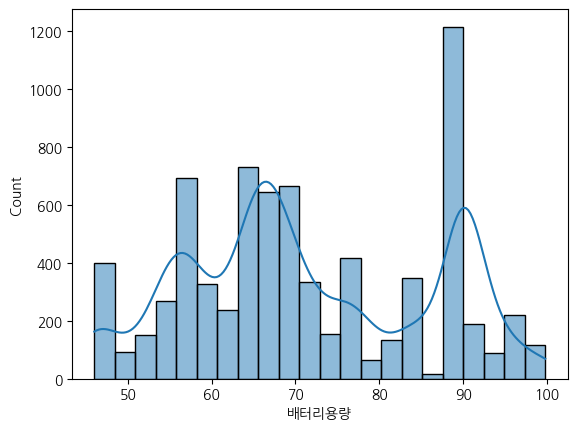

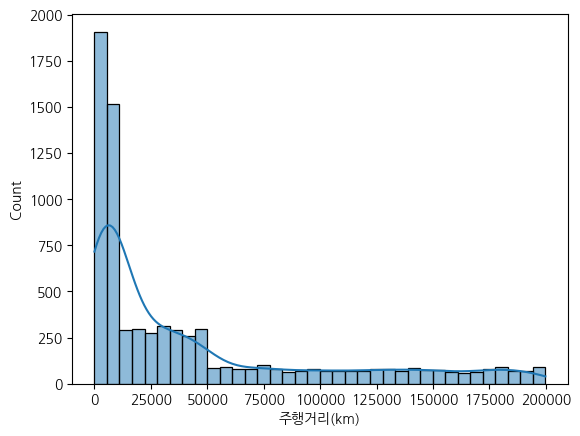

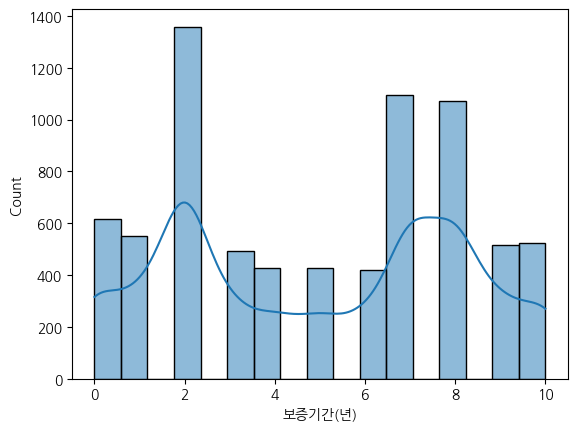

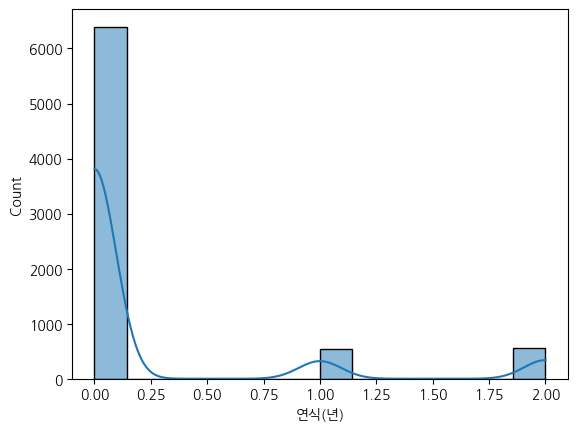

In [283]:
for var in num_col:
  eda1_num(var)

In [284]:
train.corr(numeric_only=True)

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.470917,0.383864,-0.029175,0.440537
주행거리(km),-0.470917,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.383864,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.029175,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.440537,-0.035488,-0.349962,-0.058455,1.000000


In [285]:
def eda2_num(x,y,data):
  sns.scatterplot(x= x, y=y,data = data)
  plt.title(f"{x} and {y}")
  plt.show()

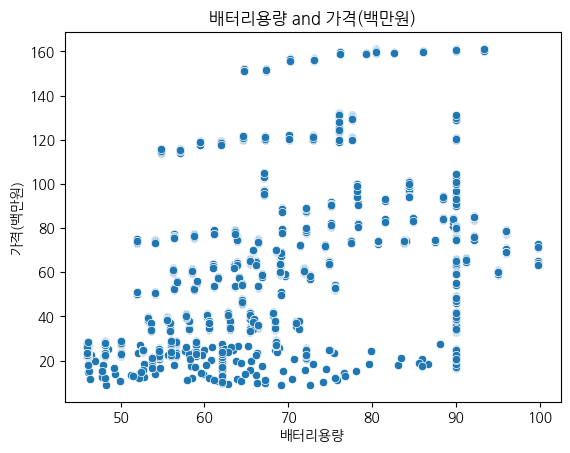

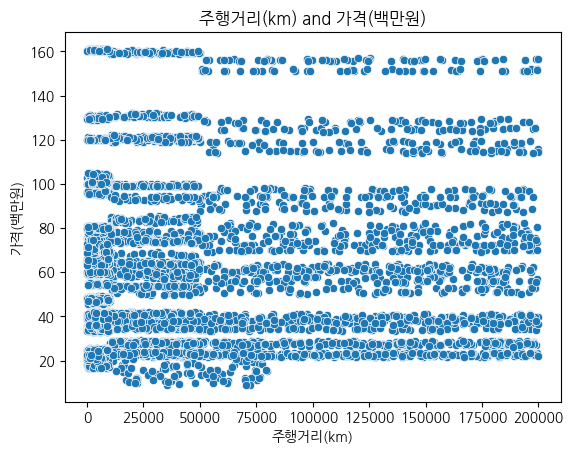

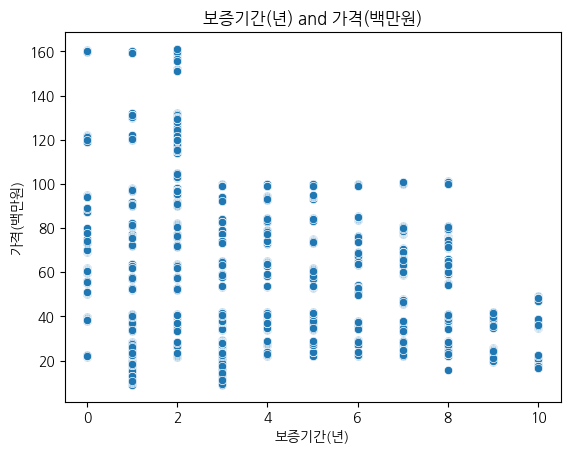

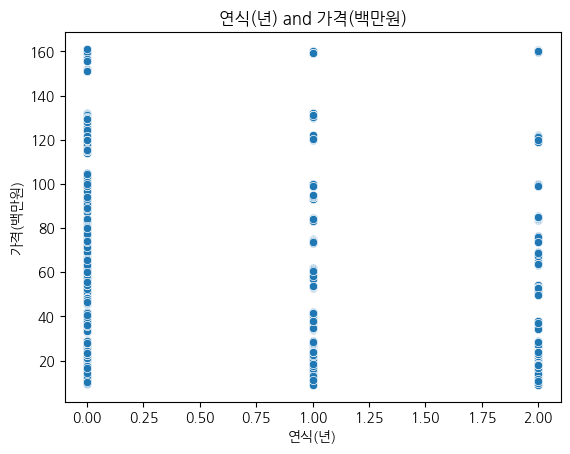

In [286]:
for var in num_col:
    eda2_num(x=var, y="가격(백만원)", data=train)

#2.모델링 준비하기

In [287]:
train = train.drop("ID",axis=1)

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder

In [289]:
#가변수화
dum_col = ["제조사","모델","구동방식","사고이력","종류","크기"]
train = pd.get_dummies(train, columns =dum_col,drop_first=True)

In [290]:
#순서형-인코딩
categories = [["Old", "Pre-Owned", "Nearly New","Brand New"]]
encoder = OrdinalEncoder(categories=categories)
train["차량상태"] = encoder.fit_transform(train[["차량상태"]])

In [291]:
train

,차량상태,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원),제조사_B사,제조사_H사,제조사_K사,제조사_P사,...,모델_i5,모델_iX,구동방식_FWD,구동방식_RWD,사고이력_Yes,종류_기타,종류_세단,종류_스포츠카,크기_소형,크기_중형
0,2.0,86.077000,13642,0,2,159.66,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2.0,56.000000,10199,6,0,28.01,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,3.0,91.200000,2361,7,0,66.27,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2.0,84.399252,21683,3,0,99.16,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,1.0,61.018000,178205,1,0,62.02,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,3.0,66.439545,3773,10,0,35.95,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
7493,1.0,46.000000,135411,2,0,23.40,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
7494,3.0,77.563933,1363,2,0,120.00,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
7495,2.0,56.000000,39445,6,2,24.00,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [292]:
# x,y 분류하기
target ="가격(백만원)"
x = train.drop(target,axis = 1)
y=train.loc[:,target]

In [293]:
# train,test 분류
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size= 0.2,random_state =42)

In [294]:
# #scaling
# scaler = MinMaxScaler()
# X_train = scaler.fit(X_train)
# X_valid = scaler.fit_transform(X_valid)

#3. 모델링

In [295]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [296]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
print("MAE",mean_absolute_error(y_valid,y_pred))
print("r2_score",r2_score(y_valid,y_pred))

MAE 2.959402186762494
r2_score 0.9888126141652217


#4. 시각화

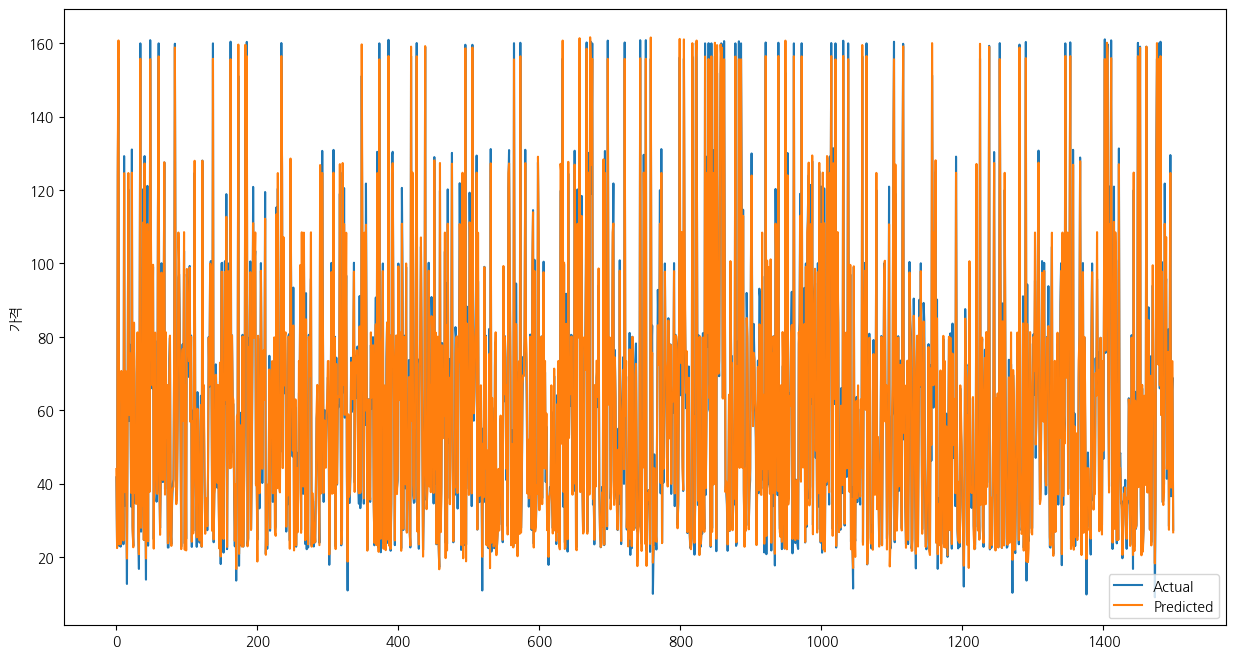

In [301]:
# 시각화
plt.figure(figsize = (15,8))
plt.plot(y_valid.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('가격')
plt.show()